Pytorch Document: [https://pytorch.org/docs/stable/index.html](https://pytorch.org/docs/stable/index.html)

참고 자료: [https://github.com/yunjey/pytorch-tutorial](https://github.com/yunjey/pytorch-tutorial)

## Pytorch Basic

### Tensors

In [1]:
import torch

# Tensors
x = torch.empty(5, 3)
print('1', x)

x = torch.rand(5, 3)
print('2', x)

x = torch.zeros(5, 3, dtype=torch.long)
print('3', x)

x = torch.tensor([5.5, 3])
print('4', x)

x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print('5', x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print('6', x)                                      # result has the same size

print('7', x.size())

# Operations
y = torch.rand(5, 3)
print('8', x + y)
print('9', torch.add(x, y))

y.add_(x) # Any operation that mutates a tensor in-place is post-fixed with an '_'. For example: x.copy_(y), x.t_(), will change x.
print('10', y)

print('11', x[:, 1])

x = torch.randn(4, 4)
y = x.view(16) # reshape/resize
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print('12', x.size(), y.size(), z.size())
print('13', x, y, z)

x = torch.randn(1)
print('14', x)
print('15', x.item()) # If you have a one element tensor, use .item() to get the value as a Python number

# Converting a Torch Tensor to a NumPy Array
a = torch.ones(5)
print('16', a)
b = a.numpy()
print('17', b)

a.add_(1) # 같은 메모리를 공유한다.
print('18', a)
print('19', b)

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print('20', a)
print('21', b)

# CUDA Tensors
# Tensors can be moved onto any device using the .to method.

# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print('22', z)


1 tensor([[-1.1228e-31,  4.7084e-43, -1.1227e-31],
        [ 4.7084e-43, -1.1228e-31,  4.7084e-43],
        [-1.1228e-31,  4.7084e-43, -1.1227e-31],
        [ 4.7084e-43, -1.1227e-31,  4.7084e-43],
        [-1.1226e-31,  4.7084e-43, -1.1226e-31]])
2 tensor([[0.8320, 0.6646, 0.9919],
        [0.3743, 0.6154, 0.3584],
        [0.4355, 0.6022, 0.9167],
        [0.3451, 0.0590, 0.2357],
        [0.8384, 0.7062, 0.3904]])
3 tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
4 tensor([5.5000, 3.0000])
5 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
6 tensor([[ 0.4049, -1.1705,  1.5475],
        [-0.2964,  1.4206, -0.0710],
        [ 1.2949, -0.3629,  0.1995],
        [-1.0843, -0.9313, -0.2033],
        [ 1.0777, -0.3450, -0.6429]])
7 torch.Size([5, 3])
8 tensor([[ 1.2105, -0.7215,  2.4600],
        [-0.1789,  1.4323, -0.0599],
        [ 1.9490,  0.1294,  1.0124]

### Autograd 자동미분 기능

Pytorch는 Tensor의 모든 연산에 대해 자동으로 미분을 제공합니다. 


In [2]:
import torch

# Create tensors.
# requires_grad = True이면 backward()가 호출되었을 때 오차 역전파 과정을 위한 미분 계산을 허용합니다.
x = torch.tensor(1., requires_grad=True) # requires_grad default: True
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 (w)
print(w.grad)    # w.grad = 1 (x)
print(b.grad)    # b.grad = 1 (1)

tensor(2.)
tensor(1.)
tensor(1.)


### Gradient Descent

다음 예시는 Linear regression 모델의 학습 과정을 간략히 나타냅니다.

In [3]:
import torch
import torch.nn as nn

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3) # get random values from standard normal dirstribution
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight.shape) # (2, 3)인 이유는 효율적으로 행렬 연산하기위해 내부적으로 transpose 시키기 때문. 신경쓰지 않아도 됩니다.
print ('b: ', linear.bias.shape) # (2)

# Build loss function and optimizer.
criterion = nn.MSELoss() # Mean Squared Error
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) # parameters()에는 layer의 모든 weights, bais가 저장되어있습니다. 
# optimizer는 한번의 step()으로 모든 가중치들을 -gradient * learning rate 만큼 수정합니다. 즉, 오차역전파를 수행하는 최적화 기법(RMSProp, Momentum, etc)을 정의합니다.

# Forward pass. input data를 전달하여 output을 계산합니다.
pred = linear(x) # wTx + b

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass. 미분 계산
loss.backward() # 중요한 점은 loss가 계산되기까지의, loss에 연결된 모든 tensor들의 gradient를 계산하는 것일뿐 실제로 가중치를 수정하지는 않습니다. 즉, gradient를 계산하여 weight.grad에 누적합니다.

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) # backward()에 의한 gradient는 weight.grad에 누적, 저장됩니다.
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step() # 실제 가중치 수정은 여기서 수행됩니다. 

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item()) # loss가 감소한 것을 확인할 수 있습니다.

w:  torch.Size([2, 3])
b:  torch.Size([2])
loss:  1.1797583103179932
dL/dw:  tensor([[ 0.3637, -0.1612,  0.2321],
        [ 0.5997,  0.0321,  0.3729]])
dL/db:  tensor([-0.7479, -0.5895])
loss after 1 step optimization:  1.1636903285980225


여기까지 기본적인 학습 과정을 살펴보았습니다. <br/>

이제 간단한 logistic regression 모델을 정의해서 위와 동일한 절차의 학습과정을 구현해보겠습니다. 

Epoch [5/1000], Loss: 0.6754
Epoch [10/1000], Loss: 0.6546
Epoch [15/1000], Loss: 0.6377
Epoch [20/1000], Loss: 0.6237
Epoch [25/1000], Loss: 0.6118
Epoch [30/1000], Loss: 0.6016
Epoch [35/1000], Loss: 0.5927
Epoch [40/1000], Loss: 0.5849
Epoch [45/1000], Loss: 0.5779
Epoch [50/1000], Loss: 0.5715
Epoch [55/1000], Loss: 0.5657
Epoch [60/1000], Loss: 0.5604
Epoch [65/1000], Loss: 0.5554
Epoch [70/1000], Loss: 0.5508
Epoch [75/1000], Loss: 0.5464
Epoch [80/1000], Loss: 0.5422
Epoch [85/1000], Loss: 0.5383
Epoch [90/1000], Loss: 0.5345
Epoch [95/1000], Loss: 0.5309
Epoch [100/1000], Loss: 0.5274
Epoch [105/1000], Loss: 0.5241
Epoch [110/1000], Loss: 0.5209
Epoch [115/1000], Loss: 0.5178
Epoch [120/1000], Loss: 0.5148
Epoch [125/1000], Loss: 0.5119
Epoch [130/1000], Loss: 0.5090
Epoch [135/1000], Loss: 0.5063
Epoch [140/1000], Loss: 0.5037
Epoch [145/1000], Loss: 0.5011
Epoch [150/1000], Loss: 0.4986
Epoch [155/1000], Loss: 0.4962
Epoch [160/1000], Loss: 0.4939
Epoch [165/1000], Loss: 0.49

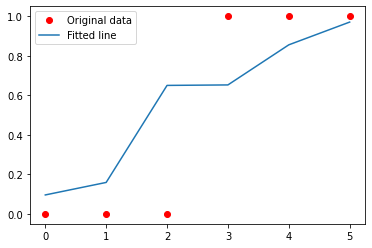

In [3]:
import torch
import torch.nn as nn
import numpy as np # Python에선 일반적으로 데이터셋으로부터 데이터를 가져올때 numpy의 ndarray 클래스를 사용합니다. 
                   # 따라서 numpy의 ndarray로부터 torch의 tensor로 변환하는 과정이 필연적임을 기억해야합니다.
import matplotlib.pyplot as plt


# Hyper-parameters (사용자가 수정 가능한 파라미터)
input_size = 2
output_size = 1
num_epochs = 1000
learning_rate = 0.01

# Toy dataset.
x_data = np.array([[1, 2],[2, 3],[3, 1],[4, 3],[5, 3],[6, 2]])
y_data = np.array([[0],[0],[0],[1],[1],[1]])

# Define your network
class MyModelNet(nn.Module):
    def __init__(self, inp_size, out_size):
        super(MyModelNet, self).__init__()
        self.lin1 = nn.Linear(inp_size, 3) # w1: (2, 3), b1: (3)
        self.lin2 = nn.Linear(3, out_size) # w2: (3, 1), b2: (1)
        self.sigmoid = nn.Sigmoid() # activation function.

    def forward(self, x):
        out = self.lin1(x)
        out = self.lin2(out)
        out = self.sigmoid(out)

        return out


# Logistic regression model
model = MyModelNet(input_size, output_size)

# Loss and optimizer
criterion = nn.BCELoss() # Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    input = torch.from_numpy(x_data).float()
    target = torch.from_numpy(y_data).float()

    # Forward pass
    output = model(input)
    loss = criterion(output, target)
    
    # Backward and optimize
    optimizer.zero_grad() # zero_grad()는 누적된 gradient, 곧 weight.grad, bias.grad에 저장된 값을 초기화합니다. 
                            # backward()를 통해 계산된 gradient가 weight.grad에 새로 덮어씌워지는 것이 아닌 누적되는 것이기 때문에
                            # 특별한 이유가 없다면 초기화해야합니다. 
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


# Plot the graph. 예측한 값이 Y 데이터를 잘 표현하고 있는 것을 확인할 수 있습니다.
predicted = model(torch.from_numpy(x_data).float()).detach().numpy() # 모델 예측 결과(tensor)를 다시 numpy로 변환
plt.plot(y_data, 'ro', label='Original data')
plt.plot(predicted, label='Fitted line')
plt.legend()
plt.show()
